# Part 1

In [492]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [493]:
df = pd.read_csv('https://gist.githubusercontent.com/jeff-boykin/b5c536467c30d66ab97cd1f5c9a3497d/raw/5233c792af49c9b78f20c35d5cd729e1307a7df7/breast-cancer.csv')

In [494]:
header = pd.read_csv('https://gist.githubusercontent.com/jeff-boykin/b5c536467c30d66ab97cd1f5c9a3497d/raw/5233c792af49c9b78f20c35d5cd729e1307a7df7/field_names.txt', sep='\n', header=None)

In [495]:
header.columns=['head']

In [496]:
header = header['head'].tolist()

In [497]:
df.columns = header

In [498]:
df.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [499]:
df.shape

(568, 32)

In [500]:
df.isnull().sum()

ID                            0
diagnosis                     0
radius_mean                   0
radius_sd_error               0
radius_worst                  0
texture_mean                  0
texture_sd_error              0
texture_worst                 0
perimeter_mean                0
perimeter_sd_error            0
perimeter_worst               0
area_mean                     0
area_sd_error                 0
area_worst                    0
smoothness_mean               0
smoothness_sd_error           0
smoothness_worst              0
compactness_mean              0
compactness_sd_error          0
compactness_worst             0
concavity_mean                0
concavity_sd_error            0
concavity_worst               0
concave_points_mean           0
concave_points_sd_error       0
concave_points_worst          0
symmetry_mean                 0
symmetry_sd_error             0
symmetry_worst                0
fractal_dimension_mean        0
fractal_dimension_sd_error    0
fractal_

In [501]:
df.dtypes

ID                              int64
diagnosis                      object
radius_mean                   float64
radius_sd_error               float64
radius_worst                  float64
texture_mean                  float64
texture_sd_error              float64
texture_worst                 float64
perimeter_mean                float64
perimeter_sd_error            float64
perimeter_worst               float64
area_mean                     float64
area_sd_error                 float64
area_worst                    float64
smoothness_mean               float64
smoothness_sd_error           float64
smoothness_worst              float64
compactness_mean              float64
compactness_sd_error          float64
compactness_worst             float64
concavity_mean                float64
concavity_sd_error            float64
concavity_worst               float64
concave_points_mean           float64
concave_points_sd_error       float64
concave_points_worst          float64
symmetry_mea

In [502]:
df.describe()

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [503]:
df.diagnosis

0      M
1      M
2      M
3      M
4      M
5      M
6      M
7      M
8      M
9      M
10     M
11     M
12     M
13     M
14     M
15     M
16     M
17     M
18     B
19     B
20     B
21     M
22     M
23     M
24     M
25     M
26     M
27     M
28     M
29     M
      ..
538    B
539    B
540    B
541    B
542    B
543    B
544    B
545    B
546    B
547    B
548    B
549    B
550    B
551    B
552    B
553    B
554    B
555    B
556    B
557    B
558    B
559    B
560    B
561    M
562    M
563    M
564    M
565    M
566    M
567    B
Name: diagnosis, dtype: object

In [504]:
df.diagnosis.value_counts()

B    357
M    211
Name: diagnosis, dtype: int64

In [505]:
# Compute the mean and median smoothness and compactness for benign and malignant tumors - 
# do they differ? Explain how you would identify this.


In [506]:
mean_smooth_benign = df.smoothness_mean[df.diagnosis == 'B']
mean_smooth_malignant = df.smoothness_mean[df.diagnosis == 'M']

print "The mean smoothness for benign tumors is " + str(np.mean(mean_smooth_benign))
print "The mean smoothness for malignant tumors is " + str(np.mean(mean_smooth_malignant))

The mean smoothness for benign tumors is 2.00032128852
The mean smoothness for malignant tumors is 4.30371563981


In [507]:
median_smooth_benign = df.smoothness_mean[df.diagnosis == 'B']
median_smooth_malignant = df.smoothness_mean[df.diagnosis == 'M']

print "The median smoothness for benign tumors is " + str(np.median(median_smooth_benign))
print "The median smoothness for malignant tumors is " + str(np.median(median_smooth_malignant))

The median smoothness for benign tumors is 1.851
The median smoothness for malignant tumors is 3.654


In [508]:
# These two look like differnet population, but the best way to tell wopuld be to use Bayesian statistics
# To confirm that the results actually do come from two different populations.  We could use the Pymc library and
# Monte Carlo Markov Chains to confirm that potential means of the two results do not overlap.


In [509]:
## I'll convert the diagnosis column into 1 and 0 to make it easier to work with.

df['diagnosis_binary'] = [1 if x =='M' else 0 for x in df.diagnosis]

In [510]:
# Write a function to generate bootstraps of the data:

#this function takes three imputs - the column we are trying to sample, the function we'd like to perform on the data
# and the number of iterations we'd like to do. It returns a list of bootstrapped statistics.

def bootstrap(sample, stat_func, iters=1000):
    boots = []
    for i in range(iters):
        random_sample = np.random.choice(sample, replace=True, size=len(sample))
        stat = stat_func(random_sample)
        boots.append(stat)
    return boots



In [511]:
## Identify 2-3 variables that are predictive of a malignant tumor

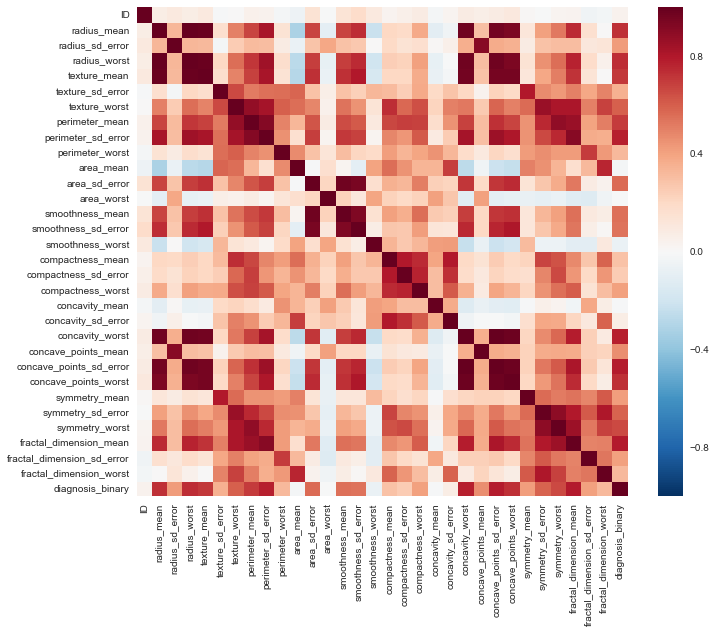

In [512]:
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(df.corr(),ax=ax, )

##This looks cool but visually it's way too much to take in

In [513]:
## The chart is nice, but not very useful because there's so many variables.  
## I'll look at just the list of correlations 

corrplot= df.corr()
corrplot.diagnosis_binary.sort_values()

smoothness_worst             -0.066629
area_mean                    -0.018099
concavity_mean               -0.009170
area_worst                   -0.007024
ID                            0.040370
concavity_sd_error            0.076068
compactness_sd_error          0.252567
compactness_mean              0.290866
fractal_dimension_worst       0.320983
perimeter_worst               0.327336
texture_sd_error              0.356276
compactness_worst             0.407293
fractal_dimension_sd_error    0.413382
symmetry_mean                 0.419731
radius_sd_error               0.422146
concave_points_mean           0.461443
smoothness_sd_error           0.546343
smoothness_mean               0.554416
area_sd_error                 0.565373
symmetry_sd_error             0.589453
texture_worst                 0.595587
symmetry_worst                0.658348
perimeter_mean                0.695648
texture_mean                  0.708389
radius_mean                   0.729376
concave_points_worst     

In [514]:
#It looks like fractal_dimensions_mean, concave_points_sd_error, and perimeter_sd_error are the most correlated with 
# the diagnosis. Since this is just a binary classification and not regression a scatter plot will not be very helpful.
# I think violin plots will be more useful in visualizing the relationship without actually building a model.

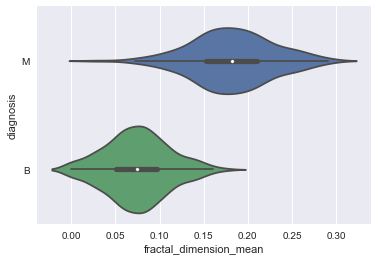

In [566]:
sns.violinplot(x='fractal_dimension_mean', y='diagnosis', data=df)

#Here we can see that the 'Benign' diagnosis is clustered around a lower fractal dimension mean, and the 'malignant'
# diangnosis is clustered around the higher values of fractal_dimensons_mean

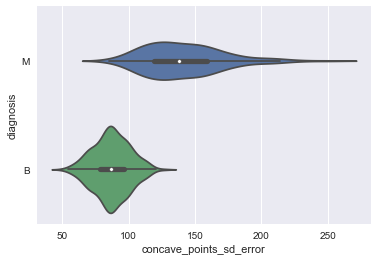

In [568]:
sns.violinplot(x='concave_points_sd_error', y='diagnosis', data=df)

#Again, this plot shows us that the benign diagnosis is more common at lower values of concave_points_sd_error
# and malignant diangosis is more common at higher values of the feature. As the value of the feature increases it is 
# more likely to be a malignant diagnosis.

## Build a model to predict the malignant tumors.

## Random Forest Classifier

How do I control for overfitting in a random forest classifier?

The primary way to control for overfitting is by adjusting the node size, the variables for each tree and the max depth. Because my classifier performed very well on the test the data I did not do a lot of parameter tuning on the random forest classifier. Since it performed well on out-of-sample data there is not a lot of evidence that it is overfit by using the default parameters. I could do a grid search on some of those parameters to see which perform the best if I wanted to be sure.

In [518]:
x = df.drop(['diagnosis','diagnosis_binary', 'ID'], axis=1)

#I need to be sure to drop ID, since that's just an index

In [519]:
y = df['diagnosis_binary']

In [520]:
# setting up a train test split so that I can evlaute my model. The classes are relatively evenly split so I 
# don't think I need to stratify the sample

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)


In [521]:
#Now I'm ready to instantiate my model

rf = RandomForestClassifier(n_estimators=300)

In [522]:
#Now I fit my model on my testing set

rf_fitted = rf.fit(X_train, y_train)

In [523]:
## Now I will score my models performance

rf_fitted.score(X_test, y_test)

0.96491228070175439

In [524]:
y_pred = rf_fitted.predict(X_test)

In [525]:
# So using all of the features I can correctly classify a tumor about 97% of the time.  That's pretty good!
# Since this is a medical problem I think it'd be helpful to look at the confusion matrix to see which 'direction'
# I'm misclassifying the diagnosis

In [526]:
# I took this from the sklearn documents:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [527]:
# compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
class_names = ['benign','malignant']

Confusion matrix, without normalization
[[104   1]
 [  5  61]]


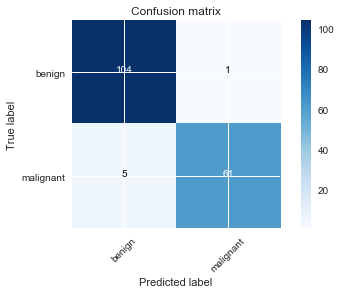

In [528]:
# Use our function above to make a pretty matrix!
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')

In [571]:
# Based on this matrix we are classifying almost all of the true benign tumors correctly but are misclassifying 5 
# of the malignant tumors as benign.

In [530]:
# which features were the most important?

rf_all_features = pd.DataFrame(rf_fitted.feature_importances_,
                                   index = x.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [531]:
#list feature importances

rf_all_features

,importance
concavity_worst,0.137450
concave_points_worst,0.120857
fractal_dimension_mean,0.116799
concave_points_sd_error,0.095295
perimeter_sd_error,0.085800
symmetry_worst,0.052687
radius_mean,0.052145
radius_worst,0.051647
texture_mean,0.048610
perimeter_mean,0.037537


In [532]:
# The random forest model allows us to extracr feature importance from the model. These are not necessarily the 
# features that increase the chances of having a benign vs malignant tumor, but they tell us which features are 
# the best at separating the two categories across the 300 trees I generated.

## Logistic Regression 

How do I control for overfitting in logistic regression models:
Overfitting for logistic regression models can be avoided by adjusting the penaly - l2 or l1 and the C value that we apply to the penalty. This can help reduce coeffecients of some of our feature in our model. This is particuraly useful in this case because so many of our variables are correlated with each other.


In [533]:
#First, I should standardize my x values

X_train_tf = StandardScaler().fit_transform(X_train)
X_test_tf = StandardScaler().fit_transform(X_test)

In [534]:
logreg = LogisticRegression()

In [535]:
fitted_logreg=logreg.fit(X_train_tf, y_train)

In [536]:
fitted_logreg.score(X_test_tf, y_test)

0.96491228070175439

In [563]:
# That's not a bad initial score, but I have so many features in this model.  Maybe some of them just aren't useful
# and might be causing our model to overfit
# Let's try using grid seach to adjust the coeffecient penalty to see if we get better results

In [538]:
grid_log = {'penalty' : ['l1','l2'],
            'C' :[.001, .01, 1, 10 ,100]
}

In [539]:
g_search_log = GridSearchCV(logreg, grid_log, cv =3)

In [540]:
g_search_log.fit(X_train_tf, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [541]:
g_search_log.best_params_

{'C': 1, 'penalty': 'l1'}

In [542]:
# So it turns out that in this case, the default parameters are the best!

In [543]:
#Let's extract the most predictive features

In [544]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(fitted_logreg.coef_))], axis = 1)
coefficients.columns=['feature','coef']

In [545]:
coefficients['coef_abs'] = np.abs(coefficients.coef)

In [546]:
coefficients.sort('coef_abs',ascending=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,feature,coef,coef_abs
21,concave_points_mean,1.456391,1.456391
20,concavity_worst,1.060257,1.060257
23,concave_points_worst,1.030390,1.030390
27,fractal_dimension_mean,1.015512,1.015512
7,perimeter_sd_error,0.979644,0.979644
6,perimeter_mean,0.920563,0.920563
15,compactness_mean,-0.864830,0.864830
22,concave_points_sd_error,0.827872,0.827872
26,symmetry_worst,0.806507,0.806507
13,smoothness_sd_error,0.749109,0.749109


In [547]:
#Above are the sorted coeffecients for the logistic regression. The higher the absolute value of the coeffeicent
# the more impact that feature has on the diagnosis.

In [548]:
#Now let's generate the confusion matrix like I did for the random forest

In [559]:
y_pred_log = fitted_logreg.predict(X_test_tf)

In [560]:
cnf_matrix_log = confusion_matrix(y_test, y_pred_log)
np.set_printoptions(precision=2)
class_names = ['benign','malignant']

Confusion matrix, without normalization
[[104   1]
 [  5  61]]


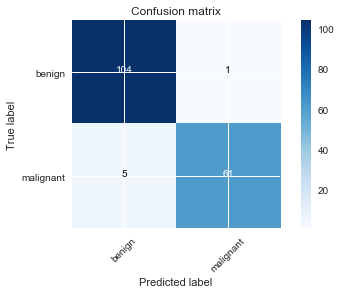

In [561]:
plt.figure()
plot_confusion_matrix(cnf_matrix_log, classes=class_names,
                      title='Confusion matrix')

In [562]:
#Not bad, but there are still a few misclassified malignant tumors.

## SVM - I later realized it's not possible to extract feature importances from a non-linear SVM model - Please see above for my real second model

In [346]:
#Now we instantiate as before
svm_model = SVC()

In [347]:
fitted_model = svm_model.fit(X_train, y_train)

In [348]:
fitted_model.score(X_test, y_test)

0.95906432748538006

In [349]:
## That's also a really good score. SVM models are very sensitive to their parameters, so I might be able to fit it 
# a little better using gridsearch

In [350]:
grid = {'C' : [.01, 0.1, 1, 10, 100, 1000],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

In [351]:
g_search = GridSearchCV(svm_model, grid, cv =3)

In [352]:
g_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [366]:
#Now we've found our best parameters - let's plug them back into our model and see if it makes any difference
g_search.best_params_

{'C': 10, 'kernel': 'rbf'}

In [367]:
svm_model_gs = SVC(C = 10, kernel='rbf')

In [368]:
fitted_model_gs = svm_model_gs.fit(X_train, y_train)

In [369]:
fitted_model_gs.score(X_test, y_test)

0.98245614035087714

In [ ]:
# Wow! 98 is really good.  Let's use the same confusion matrix as above to evaluate the model

In [370]:
y_pred = fitted_model_gs.predict(X_test)

In [371]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
class_names = ['benign','malignant']

Confusion matrix, without normalization
[[97  0]
 [ 3 71]]


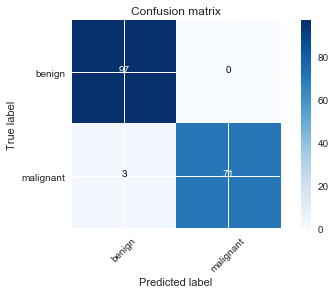

In [372]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')

In [ ]:
# There's still 3 misclassified tumors- they are actually malignant but our model classified them as benign.
# Not ideal for an important medical test. If I wanted with more time I could take a look at the ROC curve and alter
# my decision function to see if we could more accurately classify those missing values.

## Compare and contrast Random Forest and Logisitc Regression Models

### Logistic Regression
Advantages/Disadvantages:
- Easy to interpret/view impacts
- Not an emsemble method so can be overfit more easily

### Random Forest
Advantages/Disadvantages:
- Very black box method - loses interpretability 
- They can take a while to train and fit - not an issue with this data size


## Explanation

### Technical Audience - Explain the limitations of your analysis and identify possible further steps you could take.
The main limitation of my anlaysis and model is that I have a lot of features that can lead to overfitting. If I wanted to take more time, I could look more closely at the correlation among some of the featues and remove those that are very highly correlated. Additionally, given that my confusion materix shows several false negatives I would like to examine the ROC curve and possibly adjust my decision function to select for more false positive than false negatives. I'm not a medical ethicist, but I'd rather incorrectly predict that someone has cancer than miss a true incidence of cancer

### Non-Technical Audience- 

### Write a short summary of your analysis, explaining how your model works and how it performs. Briefly explain the factors that contributed to malignant vs benign tumor identification.
To analyze this data I decided to include all of the measurement categories in my models, and used those to classify whether a specific observed tumor is benign or malignant. I created two models for this analysis- a random forest classifier and a logistic regression. The random forest classifier looks at the features and splits the data sequentially based on which features best separate benign from malignant. In this case,the model determined that the best first split was on concavity_worst, meaning that there is some value of that variable that differentiates the classes the most. Then it looks at the two results of that split and chooses the next best variable to split those results further (in this case, concave_points_worst). This continues in roughly the order shown in the dataframe above. The actual Random Forest works slightly differently, but that's the basic idea.

The logistic regression model generates a value for each feature that reflects how that value increases the liklihood of the observations being malignant. The concavity, fractal and perimeter measurements had the largest coefficients and thus the largest impact on how the tumor was classified. 

The two models both had an accuracy score in the high 90s, meaning they correctly classified a tumor over 90 percent of the time. However, they did incorrectly classify some true positives as negatives so they would leave some malignant classified as benign. Given more time to adjust the model, it may be possible to adjust the classifiers to overcorrect for those false negatives at the expense of some accuracy.

### 




# Part 2

In [ ]:
#Sample 1:


import pandas as pd
import numpy as np
from sklearn import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
d = pd.read_csv('../data/train.csv')


# Setup data for prediction
x1 = data.SalaryNormalized
x2 = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
print(scores.mean())

My response:

Remember what you're calling your variables! You loaded your dataframe as variable d, so when you reference it later in your code you want to reference it as d - not data.

When you set up your data for prediction make sure that you're labeling it correctly so you can keep track of what your model is doing. Typically X refers to the feature we are using to predict, and y is the values we are trying to predict.

You imported the correct class to conduct a train-test split but didn't use it. Is there a reason you skipped over that evaluation method? Also note that since you impored cross_val_score at the beginning of your code you won't need to do it again. 

Take a look at the class notes on cross validation and the cross validation documentation - what does cv=1 mean? I'd be happy to walk you through interpreting this during office hours.

In [ ]:
#Sample 2:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
data = pd.read_csv('../data/train.csv')


# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print(scores.mean())

My response:

Good job setting up your model and x and y variables clearly. 

Why did you chose to use a linear regression model here instead of a classification model? Binary variables (what was generated with pd.get_dummies) don't work well with linear regression because they don't increase linearly.

On a related note, when you generate dummies variables be sure to leave category/column out of the model. Otherwise your model won't have a baseline and you could end up getting strange errors.

In your cross validation you scored on mean absolute error. That's not wrong, but it's always good to think about why we choose a certain scoring method and what that score is telling us. I'd be happy to explain the different scoring methods during office hours if you want more insight into this.

